Prepare File==============================

In [1]:
!cp "drive/My Drive/latihanML/rockpaperscissors.zip" "sample_data/"

In [ ]:
# !wget -O filelatihan.zip https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

In [2]:
!unzip "sample_data/rockpaperscissors.zip"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inflating: rockpaperscissors/scissors/2DEYF

In [3]:
!rm -r __MACOSX
!rm -r rockpaperscissors/README_rpc-cv-images.txt
!rm -r rockpaperscissors/rps-cv-images

Install Autotime To Be Aware Of Your Time & Keep Training Model Under 30 Min====

In [4]:
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=622e306a7315ba9e4a1acce35684beb402fdd3ae2dcc600821cd9382e3e43169
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


Set Up & Split Dataset======================================

In [5]:
import os
import pandas as pd

time: 959 µs


In [6]:
mypath = 'rockpaperscissors/'
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        tag.append(path.split('/')[-1])
        file_name.append(name)

time: 12.9 ms


In [7]:
df = pd.DataFrame({"path":full_path, 'file_name':file_name,
                   "tag":tag})
df.groupby(['tag']).size()

tag
paper       712
rock        726
scissors    750
dtype: int64

time: 17.9 ms


In [8]:
df.head()

,path,file_name,tag
0,rockpaperscissors/rock/XNzFnFkneYMqJQOF.png,XNzFnFkneYMqJQOF.png,rock
1,rockpaperscissors/rock/wZikdISRLJlJwp9q.png,wZikdISRLJlJwp9q.png,rock
2,rockpaperscissors/rock/FqRqtazi3LD2vwsr.png,FqRqtazi3LD2vwsr.png,rock
3,rockpaperscissors/rock/yoses2FRtQruYUYE.png,yoses2FRtQruYUYE.png,rock
4,rockpaperscissors/rock/ktot0Gt2YvkPXl1X.png,ktot0Gt2YvkPXl1X.png,rock


time: 30.6 ms


In [9]:
from sklearn.model_selection import train_test_split

time: 410 ms


In [10]:
X = df['path']
y = df['tag']

time: 1.12 ms


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20
)

time: 3.43 ms


In [12]:
df_tr = pd.DataFrame({"path":X_train,
                   "tag":y_train,
                   "set":'train'})
df_val = pd.DataFrame({"path":X_test,
                   "tag":y_test,
                   "set":'validation'})

time: 5.5 ms


In [13]:
print('train dataset size', len(df_tr))
print('validation dataset size', len(df_val))

train dataset size 1750
validation dataset size 438
time: 2.38 ms


In [14]:
df_all = df_tr.append(df_val).reset_index(drop=1)
print(df_all.groupby(['set','tag']).size())

set         tag     
train       paper       582
            rock        573
            scissors    595
validation  paper       130
            rock        153
            scissors    155
dtype: int64
time: 92.4 ms


In [16]:
df_all.sample(5)

,path,tag,set
1404,rockpaperscissors/scissors/JgqT9u28RqoBgJdy.png,scissors,train
53,rockpaperscissors/scissors/bAQiTy59XVNlKqc4.png,scissors,train
1996,rockpaperscissors/rock/xczZynV4iyBbLHvt.png,rock,validation
1343,rockpaperscissors/rock/jpuIILjefqjHtUtk.png,rock,train
190,rockpaperscissors/rock/W7LNJeGLwxY8gzGf.png,rock,train


time: 25.8 ms


Make Directory For Training & Validation Dataset===============================

In [17]:
import shutil
from tqdm.notebook import tqdm as tq

time: 3.14 ms


In [18]:
datasource_path = "rockpaperscissors/"
dataset_path = "dataset/"

time: 1.16 ms


In [19]:
for index, row in tq(df_all.iterrows()):

    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)


time: 1.19 s


Using Image Data Generator=================================================

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

time: 1.53 s


In [21]:
imsize = (100, 100)
input_shape = (100, 100, 3)
batch_size = 4
epochs = 8

time: 1.62 ms


In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   width_shift_range=[0,15],
                                   rotation_range=30,
                                   shear_range=0.2,
                                   vertical_flip=True,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 width_shift_range=[0,15],
                                 rotation_range=30,
                                 shear_range=0.2,
                                 vertical_flip=True,
                                 fill_mode='nearest')

time: 3.78 ms


In [23]:
train_generator = train_datagen.flow_from_directory('dataset/train/',
                                                    target_size=imsize,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
val_generator = val_datagen.flow_from_directory('dataset/validation/',
                                                    target_size=imsize,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
num_class = val_generator.num_classes
labels = train_generator.class_indices.keys()

Found 1750 images belonging to 3 classes.
Found 438 images belonging to 3 classes.
time: 216 ms


In [24]:
print(labels)

dict_keys(['paper', 'rock', 'scissors'])
time: 1.52 ms


Check Some Samples After Using Generator=======================================

In [25]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

time: 164 ms


4
[1. 0. 0.]


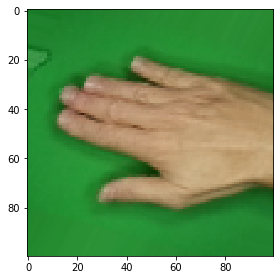

[0. 1. 0.]


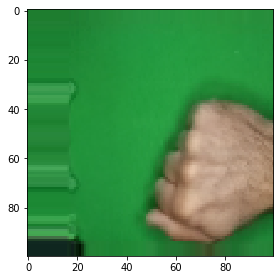

[1. 0. 0.]


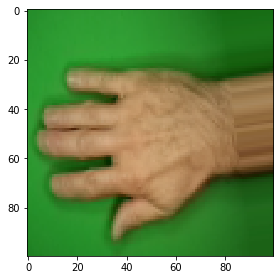

[0. 1. 0.]


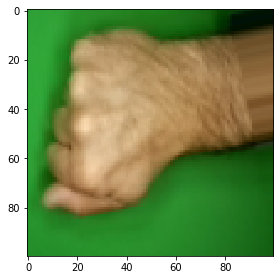

time: 820 ms


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

image_batch, labels = train_generator.next()

print(len(image_batch))
for i in range(0, len(image_batch)):
    image = image_batch[i]
    print(labels[i])
    imshow(image)

Make CNN Model=============================================

In [30]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

time: 2.16 ms


In [31]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_class))
model.add(Activation('softmax'))

time: 402 ms


In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

time: 21.3 ms


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0

Train Model=================================================

In [34]:
import numpy as np

time: 916 µs


In [35]:
train_samples = np.ceil(train_generator.samples/train_generator.batch_size)
val_samples = np.ceil(val_generator.samples/val_generator.batch_size)

time: 1.2 ms


In [36]:
his = model.fit(train_generator,
                steps_per_epoch=train_samples,
                epochs=epochs,
                validation_data=val_generator,
                validation_steps=val_samples,
                shuffle=True,
                verbose=1)

Epoch 1/8
438/438 [==============================] - 36s 83ms/step - loss: 1.0433 - accuracy: 0.4549 - val_loss: 0.7376 - val_accuracy: 0.7648
Epoch 2/8
438/438 [==============================] - 36s 83ms/step - loss: 0.4975 - accuracy: 0.8126 - val_loss: 0.3683 - val_accuracy: 0.8767
Epoch 3/8
438/438 [==============================] - 36s 83ms/step - loss: 0.3598 - accuracy: 0.8566 - val_loss: 0.2887 - val_accuracy: 0.9041
Epoch 4/8
438/438 [==============================] - 37s 83ms/step - loss: 0.3004 - accuracy: 0.8891 - val_loss: 0.2790 - val_accuracy: 0.8995
Epoch 5/8
438/438 [==============================] - 37s 84ms/step - loss: 0.2842 - accuracy: 0.8891 - val_loss: 0.2508 - val_accuracy: 0.9132
Epoch 6/8
438/438 [==============================] - 37s 84ms/step - loss: 0.2710 - accuracy: 0.9034 - val_loss: 0.2323 - val_accuracy: 0.9064
Epoch 7/8
438/438 [==============================] - 36s 83ms/step - loss: 0.2630 - accuracy: 0.9011 - val_loss: 0.2299 - val_accuracy: 0.9338

In [39]:
his.history['loss']

[1.0432618856430054,
 0.49754709005355835,
 0.3598172664642334,
 0.30039235949516296,
 0.28421998023986816,
 0.2710186541080475,
 0.26300951838493347,
 0.22306448221206665]

time: 2.62 ms


In [40]:
his.history['accuracy']

[0.45485714077949524,
 0.8125714063644409,
 0.8565714359283447,
 0.8891428709030151,
 0.8891428709030151,
 0.9034285545349121,
 0.9011428356170654,
 0.9160000085830688]

time: 2.52 ms


Loss & Accuracy Plot=======================================

In [41]:
from matplotlib import pyplot as plt

time: 780 µs


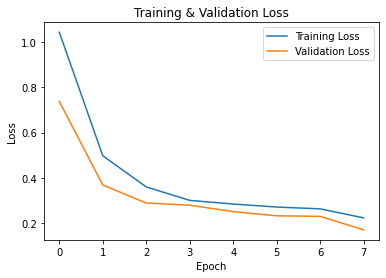

time: 170 ms


In [43]:
plt.plot(his.history['loss'], label='Training Loss')
plt.plot(his.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

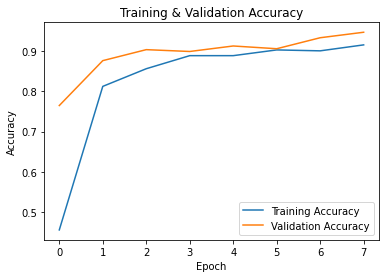

time: 186 ms


In [44]:
plt.plot(his.history['accuracy'], label='Training Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

Image Prediction===========================

In [45]:
import tensorflow as tf
from PIL import Image
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def preprocess(img,input_size):
    nimg = img.resize(imsize).convert('RGB')
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

time: 133 ms


Using TensorFlow backend.


Saving KCh0XBlgDa526pBe.png to KCh0XBlgDa526pBe.png
scissors 0.9640243


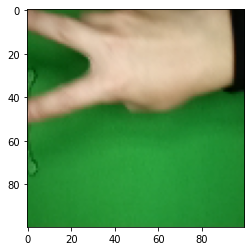

time: 42.2 s


In [46]:
imsize = (100, 100)
labels = ['paper', 'rock', 'scissors']

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    im = image.load_img(path, target_size=input_shape)
    imgplot = plt.imshow(im)
    X = preprocess(im,imsize)
    X = reshape([X])
    y = model.predict(X)
    print(labels[np.argmax(y)], np.max(y))

================================================================================